In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def load_data(path):
    return pd.read_csv(path)

data = load_data('./digits/train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


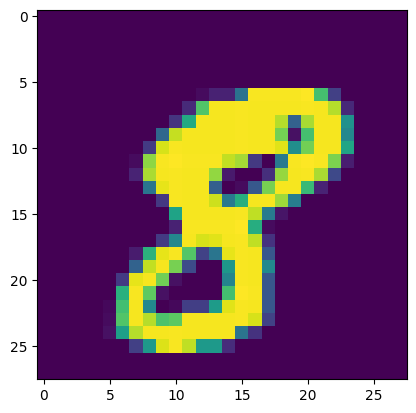

In [5]:
from matplotlib.pyplot import imshow

def display_img_from_dfrow(row):
    sqrt_n_row = int(np.sqrt(len(row)))
    sq_row = row.values.reshape(sqrt_n_row, sqrt_n_row)
    imshow(sq_row)

display_img_from_dfrow(data.iloc[10, 1:])

In [6]:
X, y = data.iloc[:, 1:], data.iloc[:, 0]
X.shape, y.shape

((42000, 784), (42000,))

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 784), (8400, 784), (33600,), (8400,))

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_jobs=-1, random_state=42)

In [9]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
from sklearn.metrics import accuracy_score
y_pred_train = clf.predict(X_train)
y_pred_train

array([6, 5, 3, ..., 2, 6, 0])

In [11]:
y_pred_train = pd.Series(y_pred_train, index=y_train.index)
accuracy_score(y_train, y_pred_train)

0.9996130952380953

In [12]:
y_pred_test = clf.predict(X_test)
y_pred_test = pd.Series(y_pred_test, index=y_test.index)

accuracy_score(y_test, y_pred_test)

0.9641666666666666

In [13]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, n_jobs=-1)

X = pd.concat([X_train, X_test])
X_tsne = model.fit_transform(X)
X_tsne = pd.DataFrame(X_tsne, index=X.index, columns=[0, 1])
X_tsne.shape

(42000, 2)

In [14]:
X_tsne.head()

,0,1
34941,84.604851,33.405270
24433,26.448744,11.343922
24432,16.228075,-41.389992
8832,22.415758,59.542065
30291,-54.927784,39.821266


In [15]:
X_train_tsne = X_tsne.loc[X_train.index]
X_test_tsne = X_tsne.loc[X_test.index]
X_train_tsne.shape, X_test_tsne.shape

((33600, 2), (8400, 2))

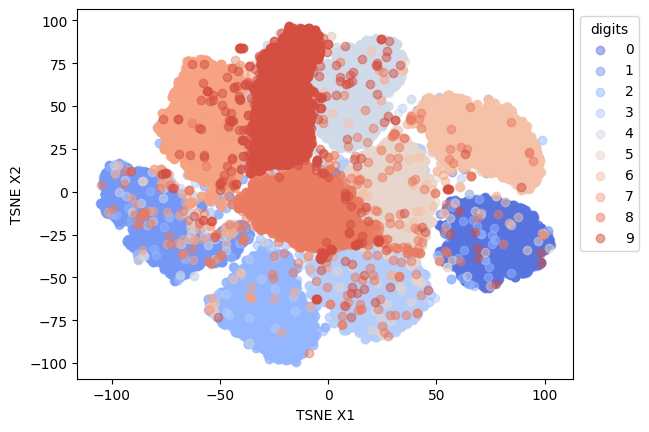

In [16]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

def plot_tsne(X_tsne, y_):
    y_un = sorted(y_.unique())
    colors = sns.color_palette("coolwarm", len(y_un))
    for num in y_un:
        y_num_ind = (y_[y_ == num]).index
        X_tsne_num = X_tsne.loc[y_num_ind]
        plt.scatter(X_tsne_num[0], X_tsne_num[1], label=f'{num}', alpha=0.5, c=colors[num])
    plt.legend(title='digits', bbox_to_anchor=(1,1))
    plt.xlabel('TSNE X1')
    plt.ylabel('TSNE X2')

y_pred = pd.concat([y_pred_test, y_pred_train]).loc[X_tsne.index]
plot_tsne(X_tsne, y_pred)

no. of 1s mispredicted as 9:  1


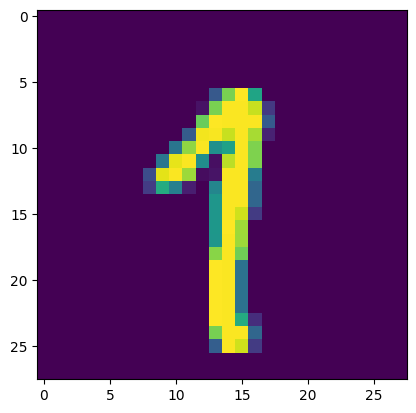

In [17]:
# visualizing mispredictions

# 1 mispredicted as 9
_1_to_9 = X.loc[y[y == 1][y_pred == 9].index]
print('no. of 1s mispredicted as 9: ', _1_to_9.shape[0])

display_img_from_dfrow(_1_to_9.iloc[0])